In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix


In [2]:
os.chdir(r"C:\Users\Pocah\OneDrive\Desktop\bootcamp")
print("Current folder:", os.getcwd())
print("Files:", os.listdir())

Current folder: C:\Users\Pocah\OneDrive\Desktop\bootcamp
Files: ['6.7 github repo.docx', 'achievement 6', 'achievement 6(mine )_', 'achievement 6.zip', 'achievement_4_project 06.2025', 'achievement_4_project 06.2025.zip', 'all pdf', 'araf', 'Creating Data Dashboards', 'Creating Data Dashboards.zip', 'HR', 'influenza', 'job pep', 'ML reports', 'ML.1.3', 'ML.py', 'pictures', 'py.tasks', 'python', 'sql', 'story line', 'Tableau charts', 'tz.pic1.jpg', 'word']


In [3]:
import os

os.chdir(r"C:\Users\Pocah\OneDrive\Desktop\bootcamp\ML.py")
print("Current folder:", os.getcwd())
print("Files:", os.listdir())


Current folder: C:\Users\Pocah\OneDrive\Desktop\bootcamp\ML.py
Files: ['Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv', 'Dataset-weather-prediction-dataset-processed (1).csv']


In [4]:
import pandas as pd

weather_path = "Dataset-weather-prediction-dataset-processed (1).csv"
answers_path = "Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"

weather = pd.read_csv(weather_path)
answers = pd.read_csv(answers_path)

print(weather.shape, answers.shape)


(22950, 170) (22950, 16)


In [5]:
os.chdir(r"C:\Users\Pocah\OneDrive\Desktop\bootcamp\ML.py")
print("Current folder:", os.getcwd())
print("Files:", os.listdir())

Current folder: C:\Users\Pocah\OneDrive\Desktop\bootcamp\ML.py
Files: ['Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv', 'Dataset-weather-prediction-dataset-processed (1).csv']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Drop columns for stations without labels
weather_station_prefixes = {c.split("_")[0] for c in weather.columns if c not in ["DATE", "MONTH"]}
answer_station_prefixes = {c.split("_pleasant_weather")[0] for c in answers.columns if c != "DATE"}

stations_without_labels = list(weather_station_prefixes - answer_station_prefixes)

cols_to_drop = []
for st in stations_without_labels:
    cols_to_drop.extend([c for c in weather.columns if c.startswith(st + "_")])

weather_filtered = weather.drop(columns=cols_to_drop)


In [8]:
# Merge weather + answers
df = weather_filtered.merge(answers, on="DATE")

In [9]:
# Create X and y
X = df.drop(columns=["DATE", "MONTH"])
y = df[[col for col in answers.columns if col != "DATE"]]

In [10]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

snippet B

In [11]:
k_range = np.arange(1, 4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k)

    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy :", test_acc)

best_k = k_range[np.argmax(test_acc)]
print("Best k value:", best_k)


i - 0
k - 1
i - 1
k - 2
i - 2
k - 3
Training accuracy: [1.         0.5665733  0.57597261]
Testing accuracy : [0.4325345  0.44749455 0.46100218]
Best k value: 3


Final model + confusion matrices (snippet C)

Final TRAIN accuracy: 0.5759726112667289
Final TEST accuracy : 0.4610021786492375


C:\Users\Pocah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


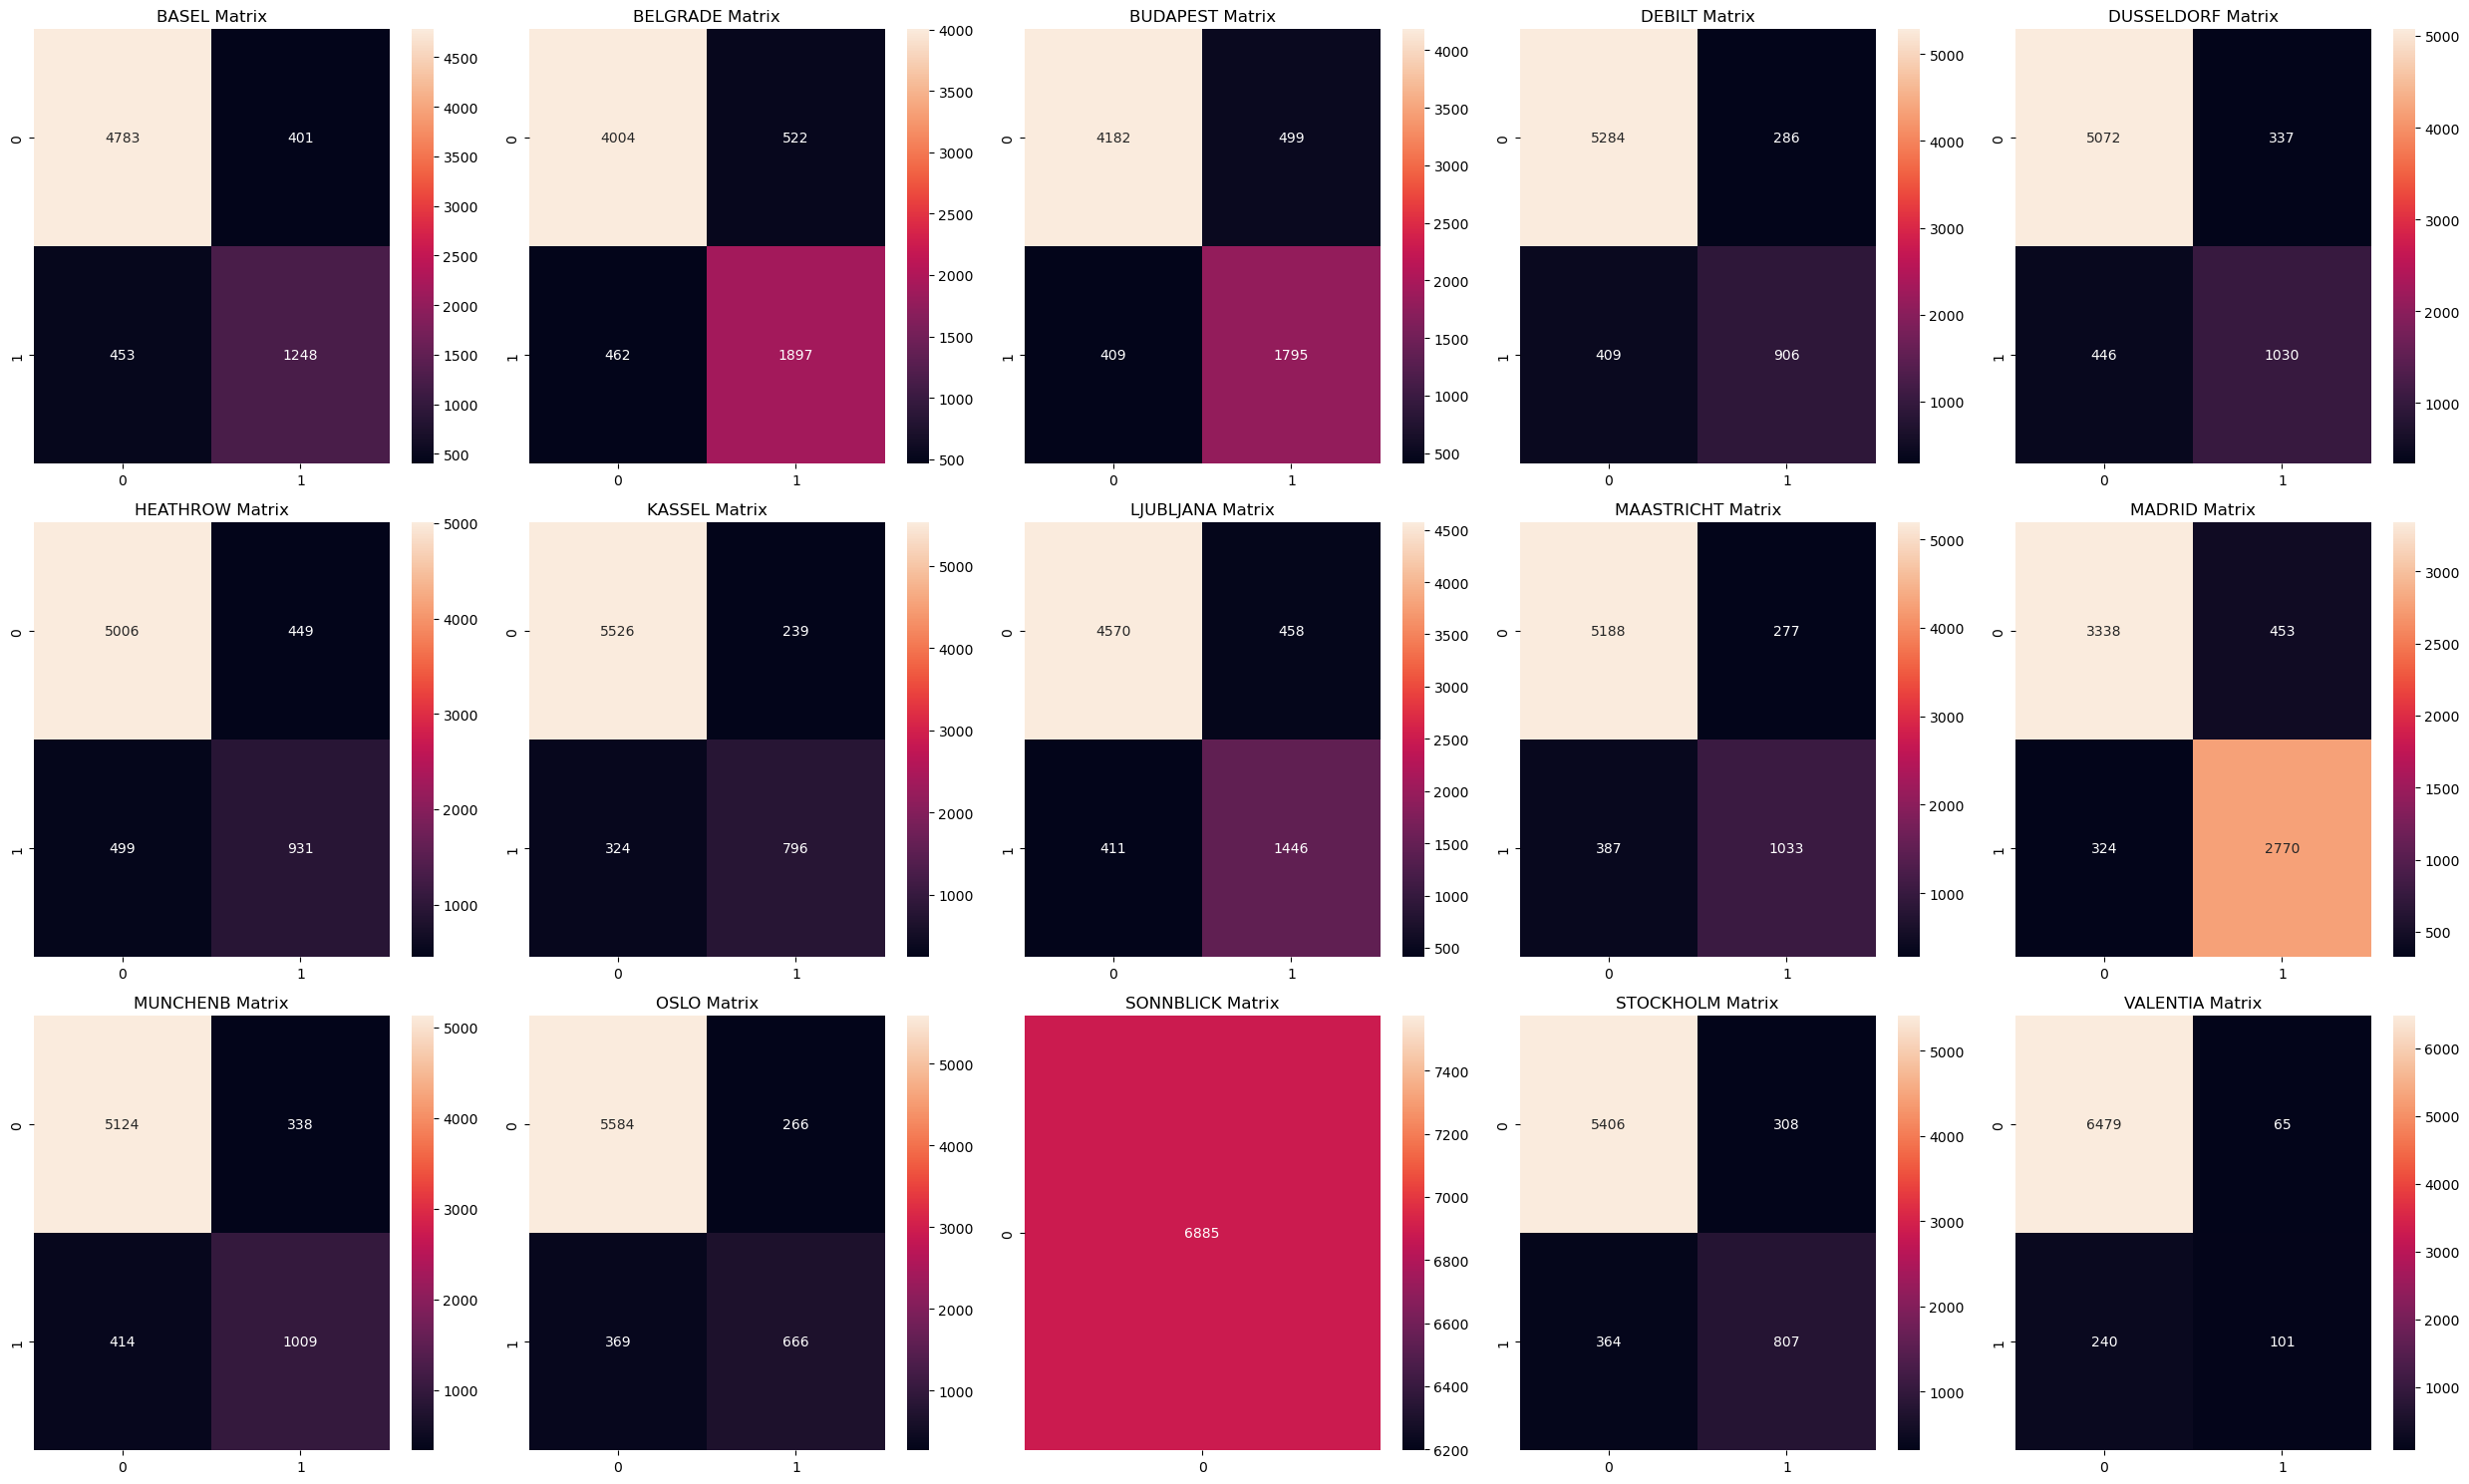

In [12]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_classifier = MultiOutputClassifier(final_knn, n_jobs=-1)

final_classifier.fit(X_train, y_train)
y_pred = final_classifier.predict(X_test)

print("Final TRAIN accuracy:", final_classifier.score(X_train, y_train))
print("Final TEST accuracy :", final_classifier.score(X_test, y_test))

# Confusion matrices
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
fig, ax = plt.subplots(3, 5, figsize=(25,15))
count = 0

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[name + key], y_pred[:, count])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        ax[i,j].set_title(name + " Matrix")
        count += 1

plt.tight_layout()
plt.show()